In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv(r'C:\Users\arjun\Downloads\Airports.csv')
df.head()

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        250 non-null    int64 
 1   Airport     250 non-null    object
 2   Location    250 non-null    object
 3   Country     250 non-null    object
 4   Code        250 non-null    object
 5   Passengers  250 non-null    int64 
 6   Year        250 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 13.8+ KB


# TASK-1 Which country has most crowded airpots?

In [4]:
df['Country'].unique()


array(['China', 'United States', 'Japan', 'India', 'United Arab Emirates',
       'Turkey', 'France', 'United Kingdom', 'Mexico', 'Vietnam',
       'South Korea', 'Netherlands', 'Brazil', 'Russia', 'Germany',
       'Spain', 'Thailand', 'Hong Kong SAR, China', 'Singapore',
       'Malaysia', 'Indonesia', 'Canada', 'Taiwan', 'Philippines',
       'Australia', 'Italy', 'The Netherlands', 'Republic of Korea',
       'Qatar'], dtype=object)

In [5]:
by_country = df.groupby('Country')
df4=by_country.sum().drop(['Year','Rank'],axis=1)
df4.sort_values(by='Passengers',axis=0,ascending=False)

,Passengers
Country,
United States,3964596952
China,2344913081
Japan,526670590
United Kingdom,518562015
India,474792880
Germany,465158183
Spain,434672131
United Arab Emirates,373342493
France,306041788


In [6]:
df4.reset_index('Country',inplace=True)

<AxesSubplot:xlabel='Passengers', ylabel='Country'>

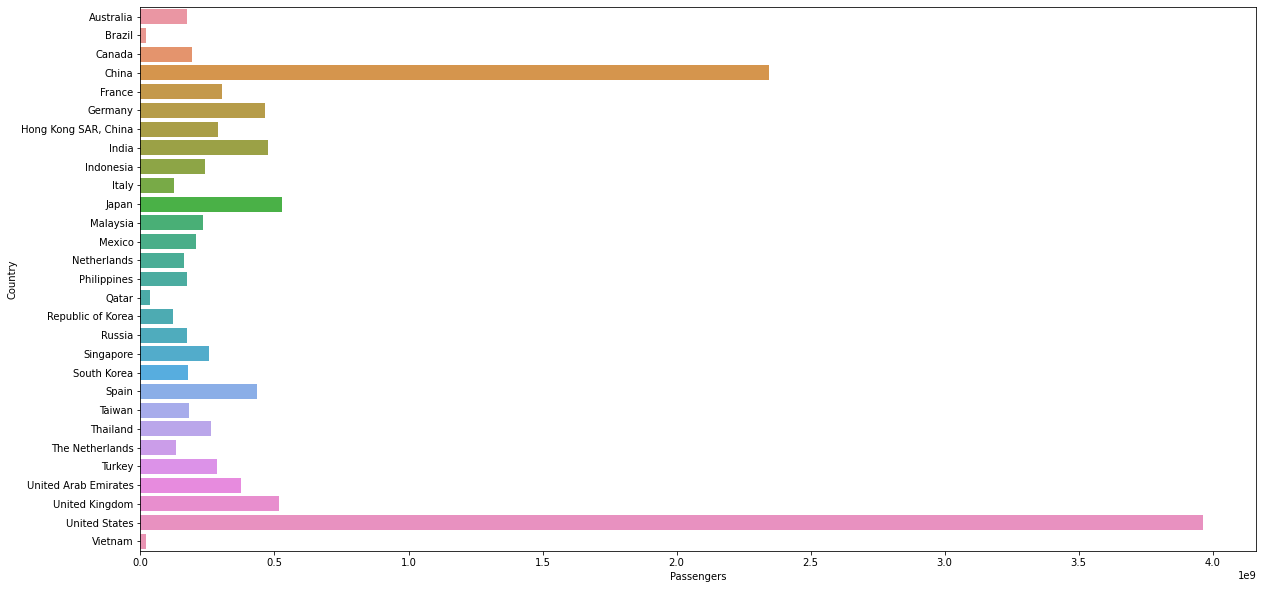

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(x='Passengers',y='Country',data=df4)

## From above analysis we see United States-3964596952,China-2344913081,Japan-526670590,United Kingdom-518562015,India-474792880 are TOP 5 crowded airpots countries.

# TASK-2 Which year had the most passenger?

In [8]:
df['Year'].unique()

array([2020, 2019, 2018, 2017, 2016], dtype=int64)

In [9]:
df[df['Year']==2020]['Passengers'].sum()

1223369322

In [10]:
df[df['Year']==2019]['Passengers'].sum()

3055838581

In [11]:
df[df['Year']==2018]['Passengers'].sum()

3008557846

In [12]:
df[df['Year']==2017]['Passengers'].sum()

2859279173

In [13]:
df[df['Year']==2016]['Passengers'].sum()

2724498356

# TASK-3 Which year had the least passenger?

In [14]:
df[df['Year']==2020]['Passengers'].sum()

1223369322

### From above analysis we see Year 2019 is no. 1 ,Year 2018 is no.2,Year 2017 is no.3,year 2016 is no.4 and Year 2020 is at no.5 position.

### OR In a different method

In [15]:
byyrs = df.groupby('Year')


In [16]:
df3=byyrs.sum()
df3

,Rank,Passengers
Year,,
2016,1275,2724498356
2017,1275,2859279173
2018,1275,3008557846
2019,1275,3055838581
2020,1275,1223369322


In [17]:
df3.reset_index('Year',inplace=True)
df3

,Year,Rank,Passengers
0,2016,1275,2724498356
1,2017,1275,2859279173
2,2018,1275,3008557846
3,2019,1275,3055838581
4,2020,1275,1223369322


<AxesSubplot:xlabel='Year', ylabel='Passengers'>

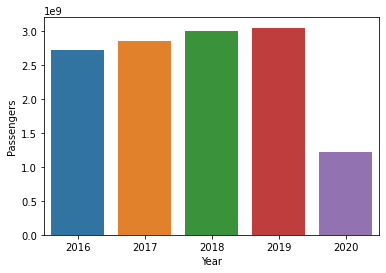

In [18]:
sns.barplot(y='Passengers',x='Year',data=df3)

# TASK-4 What is the total of passenger in india in different years?

In [21]:
total_passenger = pd.pivot_table(df,index=['Country','Year'],aggfunc={'Passengers': 'sum'})
total_passenger

Passengers
Country       Year            
Australia     2016    41985810
              2017    43410355
              2018    44475976
              2019    44446838
Brazil        2020    20322520
...                        ...
United States 2017   869980194
              2018   904921387
              2019   934865503
              2020   368767320
Vietnam       2020    21900000

[112 rows x 1 columns]

In [23]:
total_passenger.loc['India']

,Passengers
Year,
2016,100311940
2017,110655762
2018,119777707
2019,115546471
2020,28501000
